In [5]:
import pandas as pd
import numpy as np
import re

In [6]:
user_tweets = pd.read_csv('//Volumes/Mydata/DataScience/SentimentAnalysis/train.csv')


In [7]:
user_tweets.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
y = user_tweets.label

In [9]:
def clean_str(string):
    
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'rt", " \'rt", string)
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', string) # removing hyperlinks
    string = re.sub(r'\brt\b', '', string)
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', string)
    string = re.sub(r'@[\S]+', '', string)
    string = re.sub(r'#(\S+)', r' \1 ', string)
    string = re.sub(r'\brt\b', '', string)
    string = re.sub(r'\.{2,}', ' ', string)
    string = re.sub(r'\s+', ' ', string)
    string = re.sub("\d+", "", string)
    return string.strip().lower()

In [10]:
user_tweets['cleaned_tweet2'] = user_tweets['tweet'].apply(clean_str)

In [11]:
user_tweets.head()

,id,label,tweet,cleaned_tweet2
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i ca n't use ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [12]:
user_tweets.drop(['label', 'id'], axis = 1, inplace = True)

In [13]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize


In [14]:
#port = PorterStemmer()
#port.stem(user_tweets['cleaned_tweet2'])
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS
nw_wds = ['aa', 'aaa', 'aaaa', 'aaaaaah', 'aaahhhh', 'aaand','user', 'aaawwwww', 'aaahhhhh', 'aaaaa','aaaaah', 'aaaaand', 'aaaaaand']
stop_words = stop_words.union(nw_wds)

In [15]:
def preprocess_tweet_text(tweet):
    
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(stemmed_words)

In [16]:
user_tweets.cleaned_tweet2 = user_tweets['cleaned_tweet2'].apply(preprocess_tweet_text)

In [17]:
from wordcloud import WordCloud, STOPWORDS 
from matplotlib import pyplot as plt


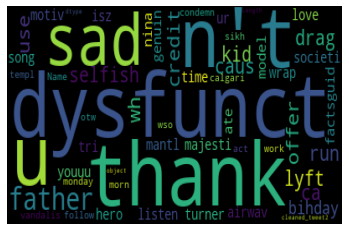

In [18]:
wc = WordCloud().generate(str(user_tweets['cleaned_tweet2']))
plt.imshow(wc, interpolation = 'bilinear', aspect = 'auto')
#plt.figure(figsize=(20,16))
plt.axis('off')
plt.show()

In [19]:
#Vectorizer syntax
vect = TfidfVectorizer(max_features = 20000).fit(user_tweets.cleaned_tweet2)
X = vect.transform(user_tweets.cleaned_tweet2)

In [20]:
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()


,aaberg,aadityaji,aah,aakhri,aal,aalivyahsimon,aaliyah,aamaadmipay,aameer,aamirkhan,...,zucchini,zulu,zuma,zumba,zurich,zx,zydeco,zz,zzz,zzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_df.shape  

(31962, 20000)

In [76]:
X_df.shape

(31962, 20000)

In [77]:
y.shape

(31962,)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,  X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 42)

In [80]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import mean_squared_error


In [81]:
#gnb = GaussianNB()

In [85]:
#gnb.fit(X_train, y_train)
#p = gnb.predict(X_test)
#error = mean_squared_error(p, y_test)


In [103]:
#gnb.score(p, y_test)

In [86]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
# Instantiate the model 
#class

vocab_size = 20000
embed_size = 128

In [120]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))

model.add(LSTM(units = 64, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 2, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/2


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size= 0.2, random_state = 42, stratify = y )

In [65]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [66]:
y_predicted = log_reg.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
#y_predicted = log_reg.predict(X)
acurracy = accuracy_score(y_test, y_predicted)#0.9009
acurracy

0.939